* This notebook was made to compare the Rmix, location of near and far field of each run case between different river flow scenarios.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [3]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
jannotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
jannotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [5]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')
jannotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

* Look at stratification at some stations for each case under different river flow conditions.

In [6]:
def plot_S_stra(grid_T1,grid_T2,grid_T3,tst,ted,dep_ind,stn,strings,smin = 0,smax = 33):
    """This function was made to compare stratification for selected run case
    with those under different river flow periods."""
    S_stn = {}; origin ='lower';
    fig, axs = plt.subplots(1,3,figsize = (20,5))
    for grid_T, ax,string in zip([grid_T1,grid_T2,grid_T3],axs,strings):
        S = grid_T.variables['vosaline']
        t = grid_T.variables['time_counter']
        dep_T = grid_T.variables['deptht']
        S_stn[string] = S[:,:,sites[stn]['j'],sites[stn]['i']]
        ## mask
        tmask_point = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask_point) 
        np_mask=np_mask +np.zeros(S_stn[string].shape) 
        S_stn[string] = np.ma.masked_array(S_stn[string],mask=np_mask) ## mask sal=0 by tmask
        time_inds = np.arange(S.shape[0]) ## Define time
        ## stra
        CS= ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[string][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        #CS2 = ax.contour(CS,colors = 'k', origin=origin,hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        #cbar.add_lines(CS2)
        cbar.set_label('Practical Salinity')
        ax.set_title(string)
        ax.set_ylim([dep_T[dep_ind], dep_T[0]])
        ax.set_xlim(time_inds[tst],time_inds[ted])
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')

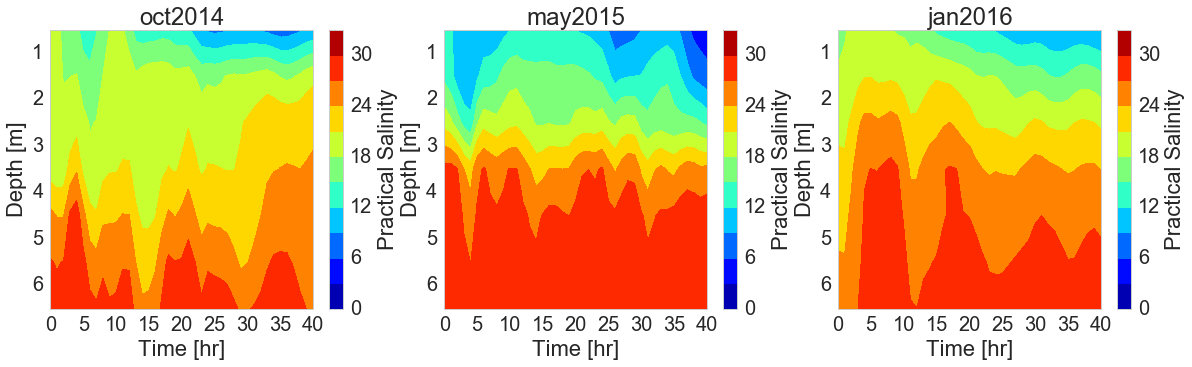

In [7]:
plot_S_stra(octriver_T,mayriver_T,janriver_T,0,40,6,'Sandheads',['oct2014','may2015','jan2016'])

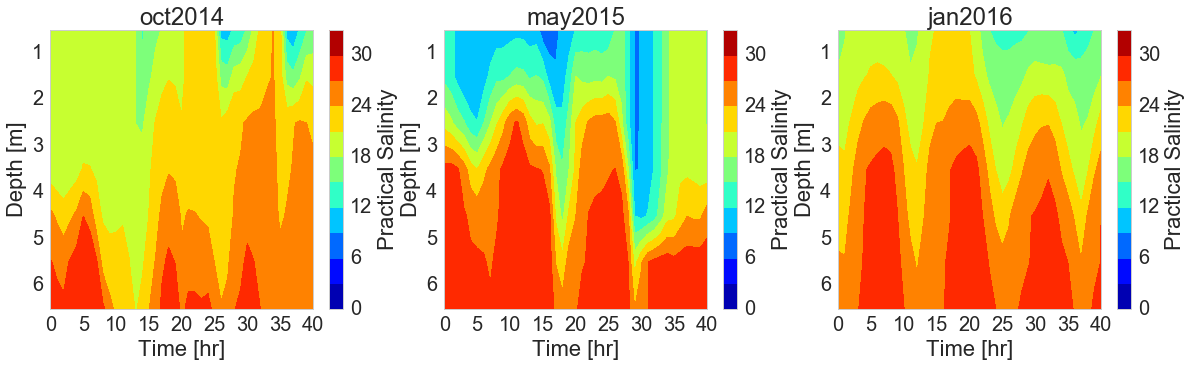

In [8]:
plot_S_stra(octall_T,mayall_T,janall_T,0,40,6,'Sandheads',['oct2014','may2015','jan2016'])

* Next, look at transition of near and far-field during weak wind, moderate wind and high wind under different river flow scenarios.

S_ref 26.6485
S_thre 25.5792752838
i,lon,real salinity 12 -123.475 16.6677
i,lon,real salinity 13 -123.47 16.4818
i,lon,real salinity 50 -123.277 16.7962
i,lon,real salinity 63 -123.21 16.561
S_ref 18.7855
S_thre 16.6154542923
i,lon,real salinity 25 -123.407 24.0631
S_ref 25.2179
S_thre 23.9484008789


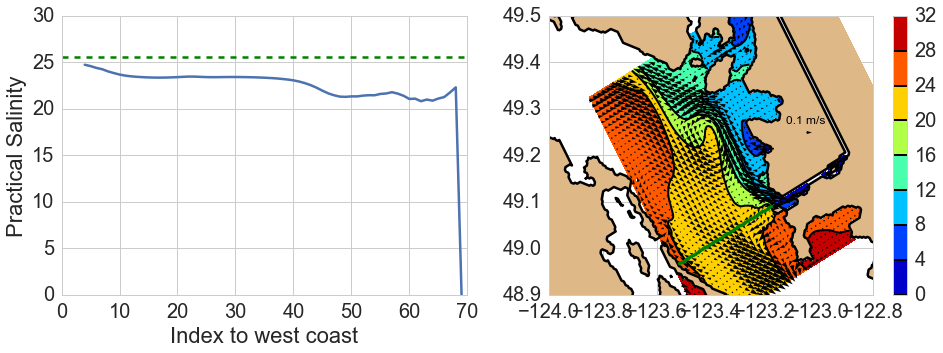

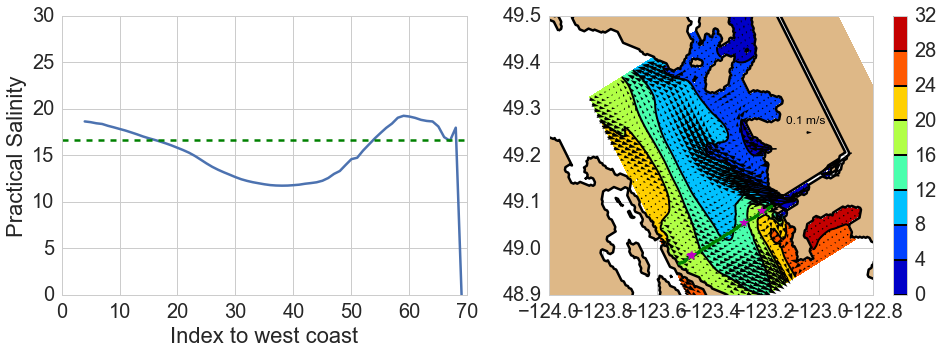

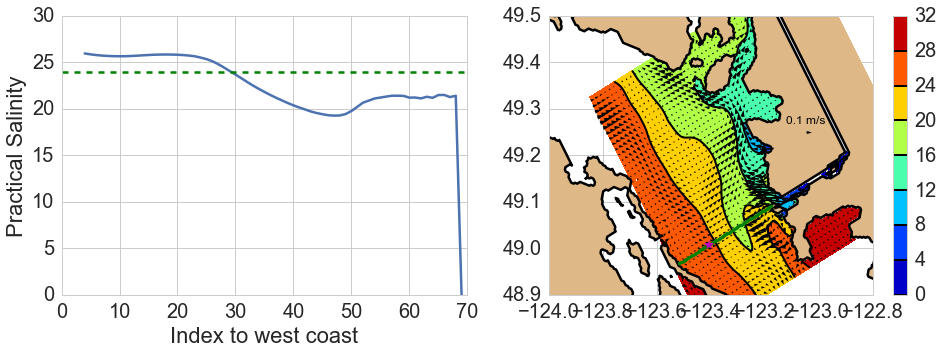

In [9]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,48,143,0,0.2) ## Oct 2~5, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,192,263,0,0.2) ## May 9~11, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,168,239,0,0.2) ## Jan 8~10, late neap early spring 

In [10]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']

        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [11]:
def threshold_whole_domain(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind,strings):
    """This function was made to apply the near, far field threshold into the 
    whole domain and look at the range of near and far field plume, as well as
    the age of different plume region defined."""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    r_wind = rmix['river+winds']/rmix['all']
    r_tide = rmix['river+tides']/rmix['all']
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    levels = [0.1,0.3,0.5,0.7,0.9]
    origin = 'lower';
    fig, axs = plt.subplots(1,2,figsize = (16,5))
    for ax, r,ti in zip([axs[0],axs[1]],[r_wind,r_tide],strings):
        CS = ax.contourf(lon[:],lat[:],r[:],levels,cmap = 'jet',origin=origin,
                   extend='both')
        CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,
                  hold='on',linewidths=(2,))
        plt.clabel(CS2,fmt='%2.1f', colors='g',fontsize = 14)
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])
        ax.set_title(ti)

In [12]:
def threshold_near_far(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind):
    """This function is made to select the 
    transition from near to far field in the plume by
    criteria of Rmix(river+wind)/Rmix(all) >=0.9 and 
    Rmix(river+tide)/Rmix(all) <=0.7"""
    far_rmix_wind = [];
    far_rmix_tide = [];
    far_lon = []; iss =[];
    lon = gridT5.variables['nav_lon']
    f, rmix = RS.plot_Rmix_together(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind)
    fig, ax = plt.subplots(1,1,figsize = (14,3))
    for i in np.arange(4,70):
        if (rmix['river+winds'][36,i]/rmix['all'][36,i] >= 0.9) and \
        (rmix['river+tides'][36,i]/rmix['all'][36,i] <= 0.7):
            ax.plot(lon[36,i],rmix['river+winds'][36,i],'g*',markersize = 10)
            ax.plot(lon[36,i],rmix['all'][36,i],'y*',markersize = 10)
            ax.plot(lon[36,i],rmix['river+tides'][36,i],'b*',markersize = 10)
            far_rmix_wind.append(rmix['river+winds'][36,i])
            far_rmix_tide.append(rmix['river+tides'][36,i])
            far_lon.append(lon[36,i])
            iss.append(i)
    ax.set_xlim([-123.55,-123.15])
    return far_rmix_wind,far_rmix_tide,far_lon,iss

In [13]:
strings = ['rmix(wind)/rmix(all)','rmix(tide)/rmix(all)']

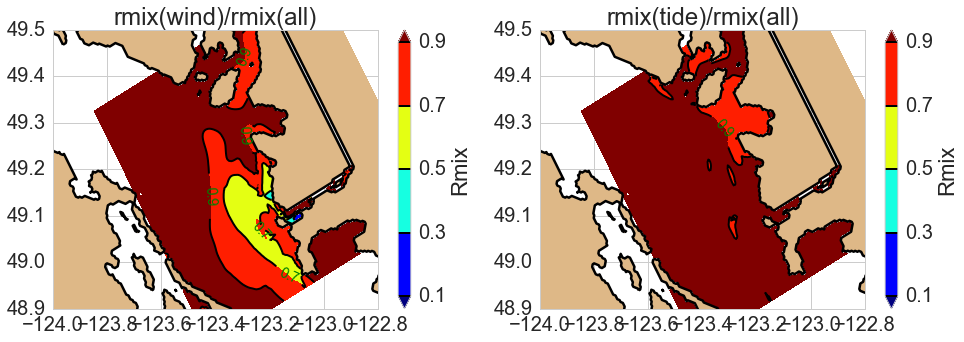

In [14]:
## the whole domain, weak winds + neap tides, oct 2~5
threshold_whole_domain(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10,strings = strings)

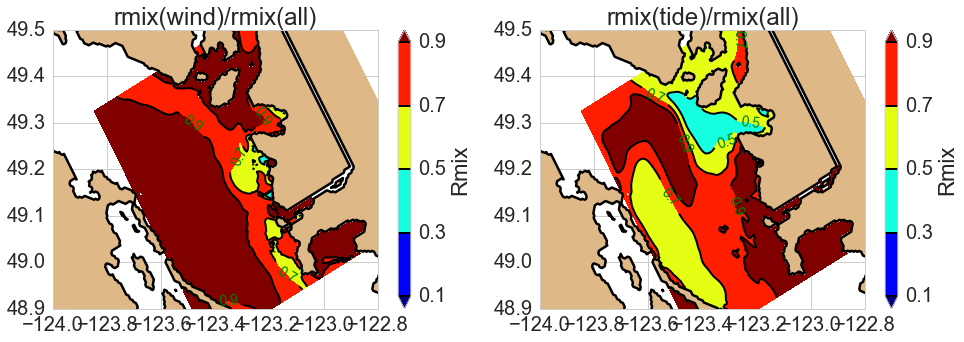

In [15]:
# the whole domain, weak winds + spring tides, may 9~11
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,192,263,10,strings = strings)

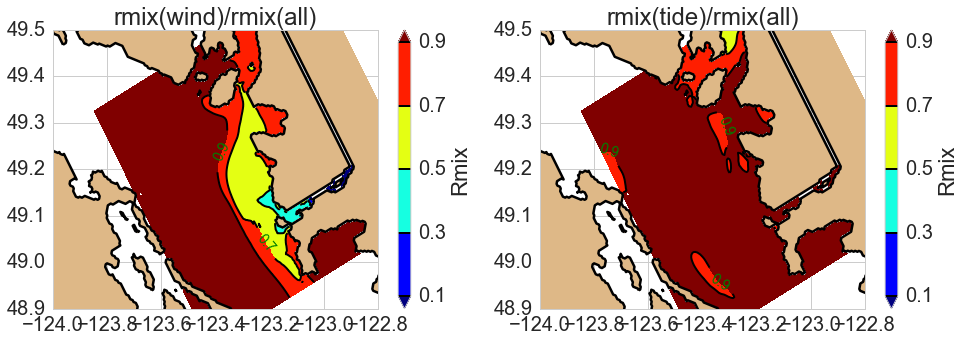

In [16]:
# the whole domain, weak winds + late neap tides, jan 8~10
threshold_whole_domain(jannowind_T,jannowind_T,jannotide_T,jannof_T,janall_T,168,239,10,strings = strings)

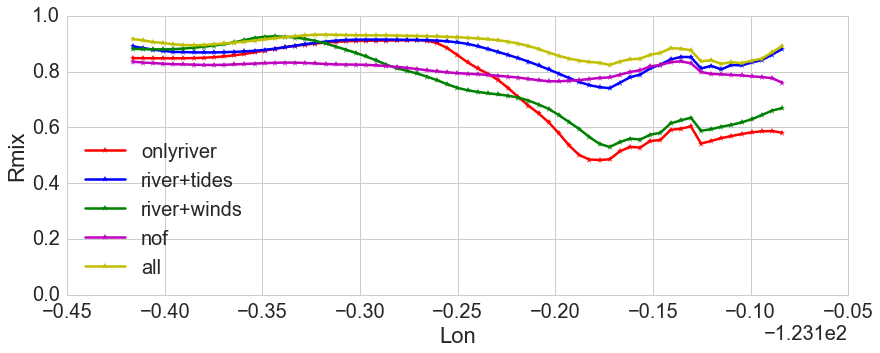

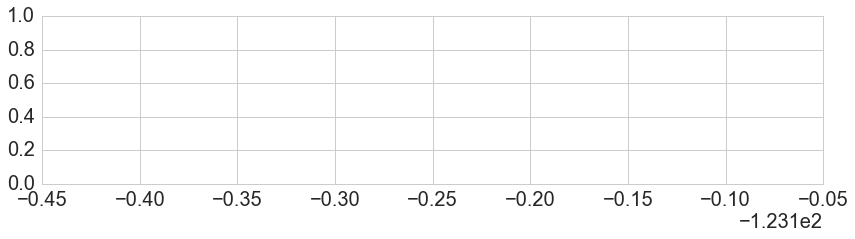

In [17]:
## weak winds +neap tides: oct 2~5
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,48,143,np_mask,10)

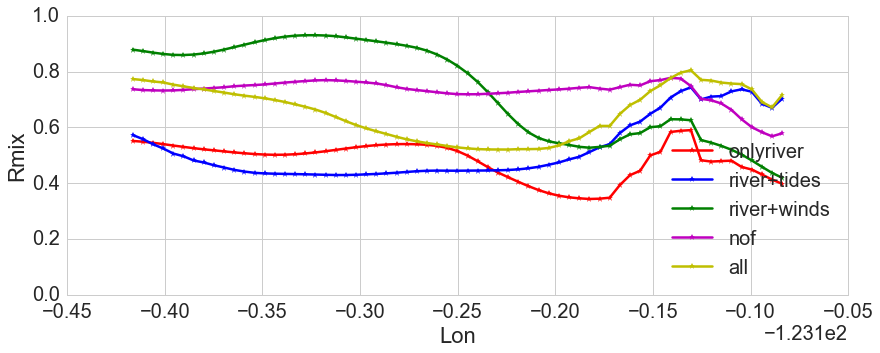

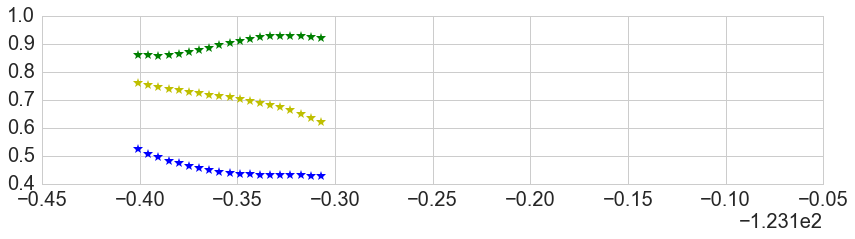

In [18]:
## weak winds +spring tides: may 9~11
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,192,263,np_mask,10)

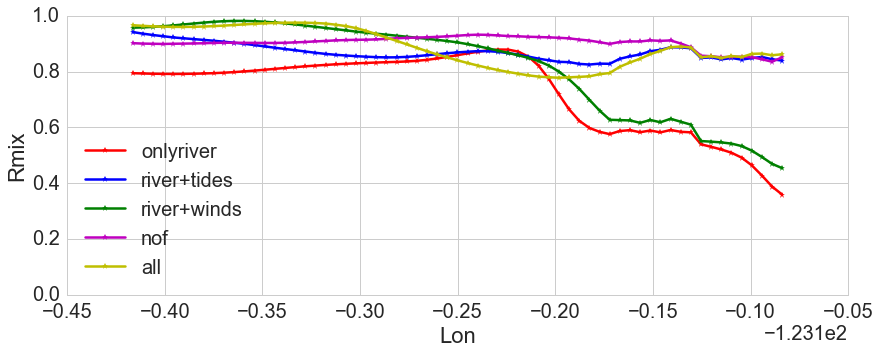

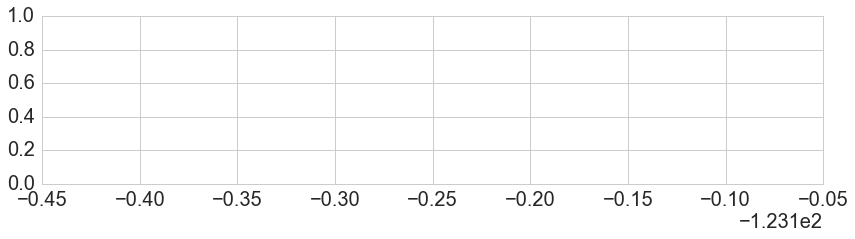

In [19]:
## weak winds + late neap tides: jan 8~10
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,168,239,np_mask,10)

* Moderate wind

i,lon,real salinity 52 -123.267 26.8949
i,lon,real salinity 53 -123.262 26.6704
S_ref 27.7367
S_thre 26.8197989273
i,lon,real salinity 32 -123.371 22.5049
i,lon,real salinity 33 -123.366 22.276
S_ref 23.8765
S_thre 22.4191612244
i,lon,real salinity 35 -123.355 18.3831
i,lon,real salinity 36 -123.35 18.1294
i,lon,real salinity 46 -123.298 18.1085
i,lon,real salinity 47 -123.293 18.2393
i,lon,real salinity 54 -123.257 18.3885
i,lon,real salinity 55 -123.251 18.1596
i,lon,real salinity 57 -123.241 18.0621
S_ref 20.1906
S_thre 18.2172550964
i,lon,real salinity 58 -123.236 25.5461
i,lon,real salinity 59 -123.231 25.4949
i,lon,real salinity 60 -123.225 25.3431
S_ref 26.4876
S_thre 25.3958948135


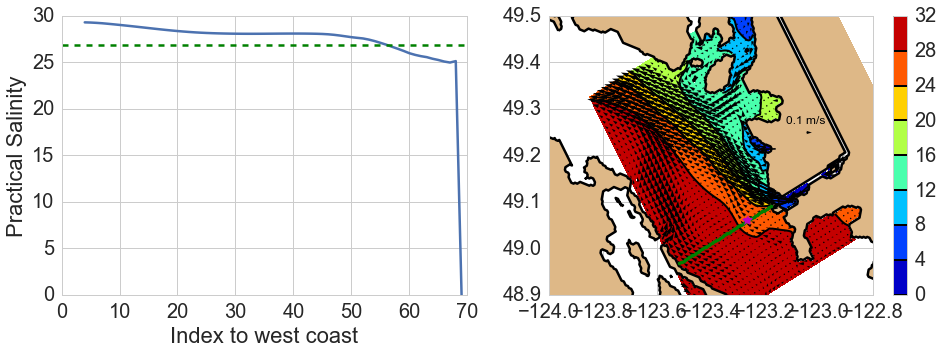

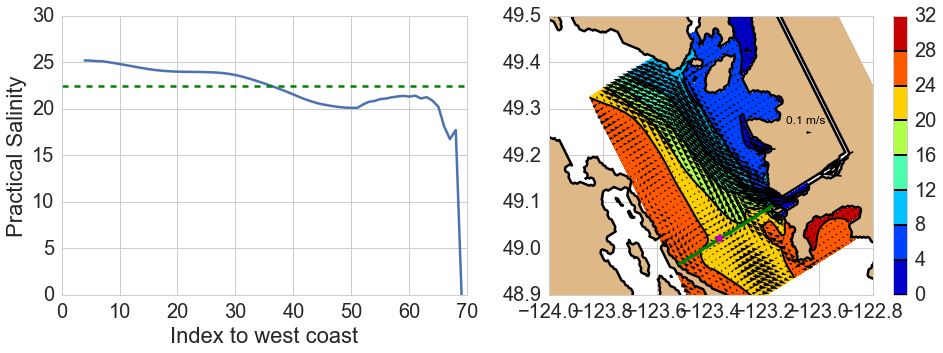

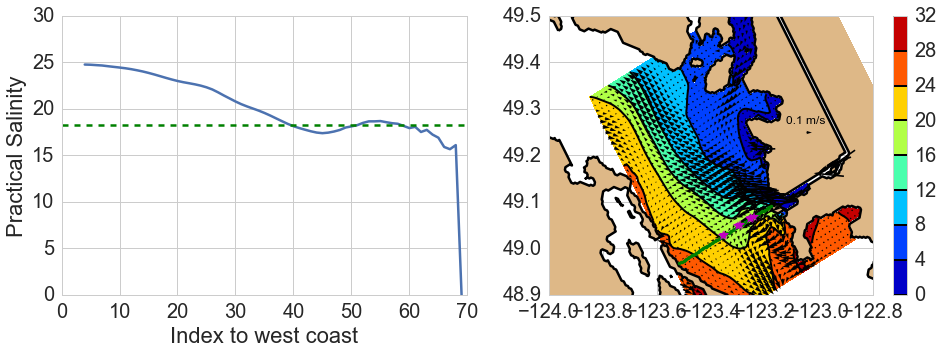

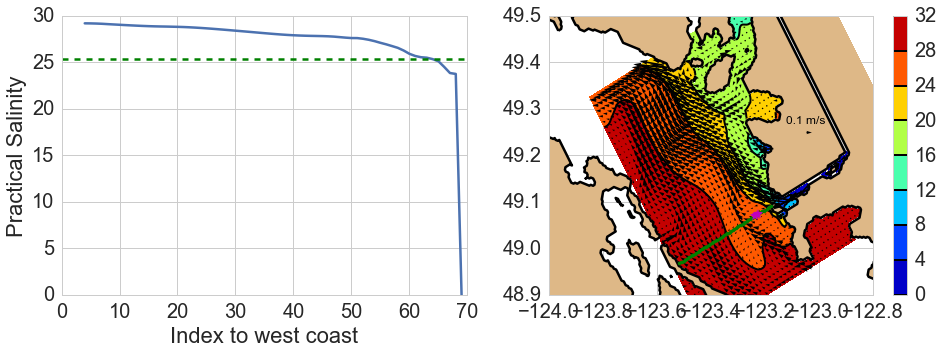

In [20]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,408,480,0,0.2) ## Oct 18~20, late spring to neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,288,359,0,0.2) ## May 13~15, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,360,455,0,0.2) ## May 16~19, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,384,455,0,0.2) ## Jan 17~19, late neap early spring 

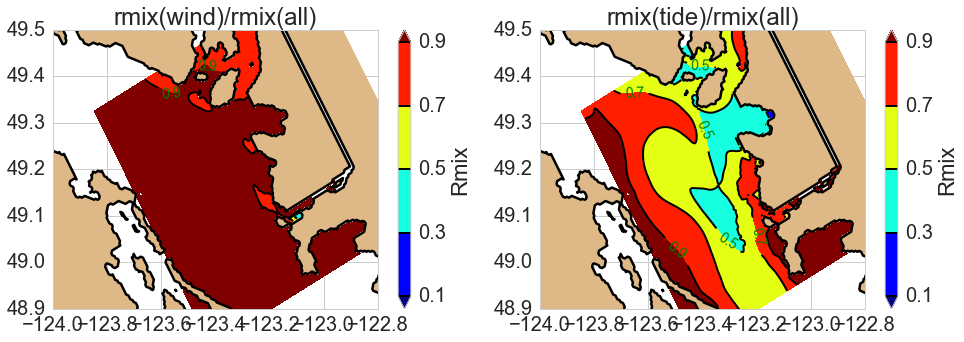

In [21]:
## the whole domain, moderate winds + late spring to neap, oct 18~20
threshold_whole_domain(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10,strings = strings)

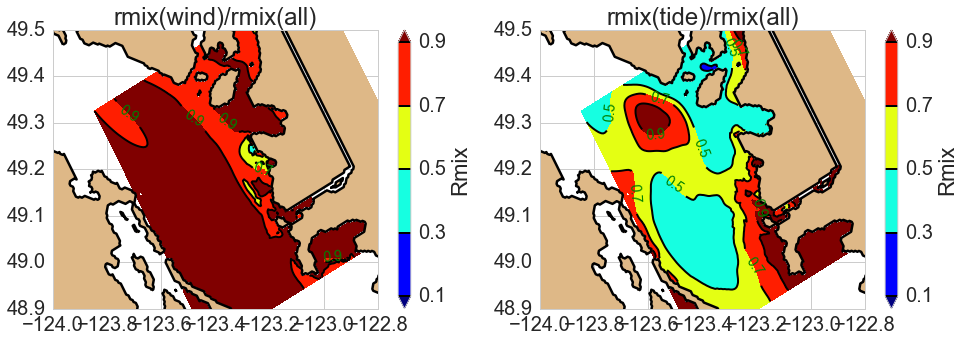

In [22]:
# the whole domain, moderate winds + neap tides, may 13~15
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10,strings = strings)

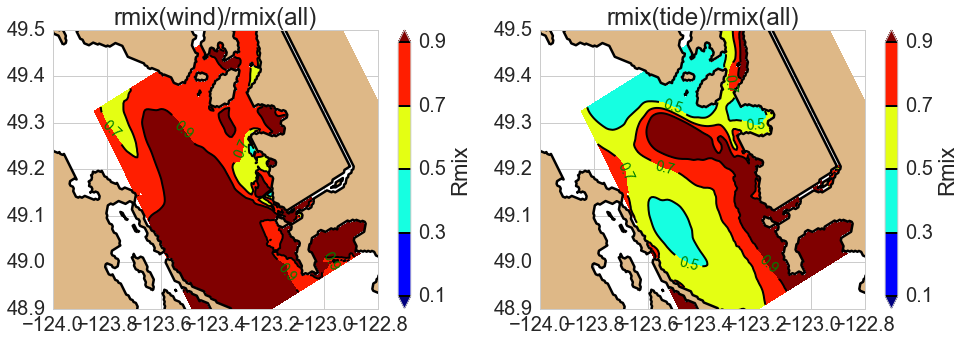

In [23]:
# the whole domain, moderate winds + spring tides, may 16~19
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10,strings = strings)

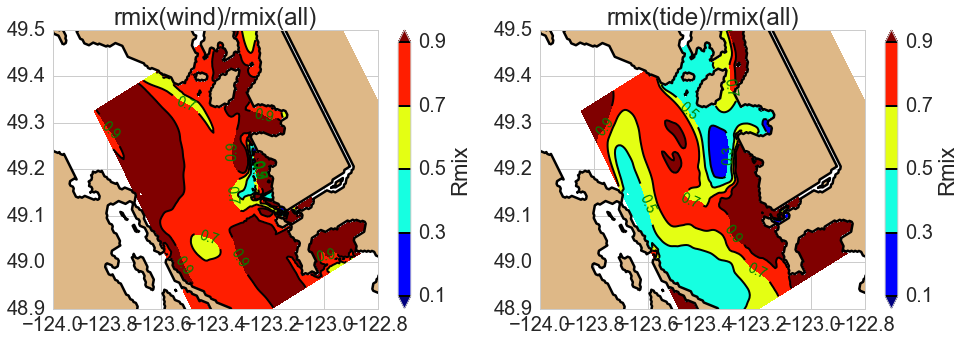

In [24]:
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,648,695,10,strings = strings)

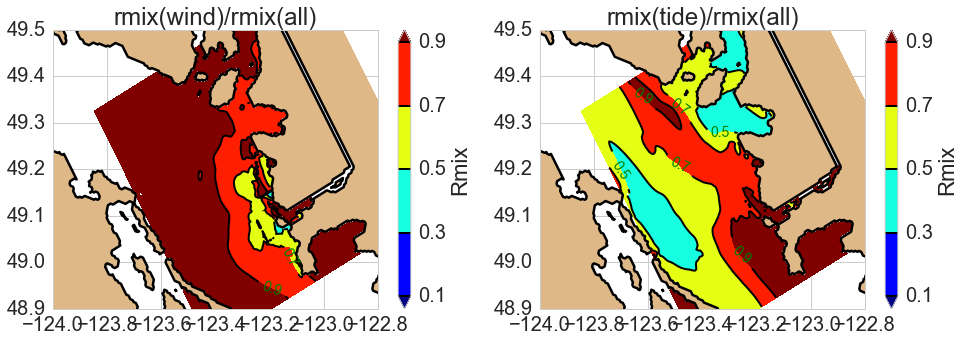

In [25]:
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,72,143,10,strings = strings)

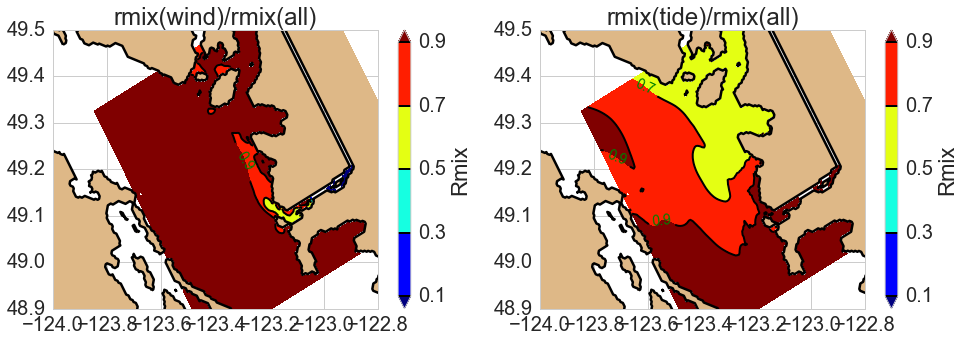

In [26]:
# the whole domain, moderate winds + late neap early spring tides, jan 17~19, no far field, plume region small
threshold_whole_domain(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,384,455,10,strings = strings)

i,lon,real salinity 27 -123.397 22.059
S_ref 23.6323
S_thre 22.1408561325


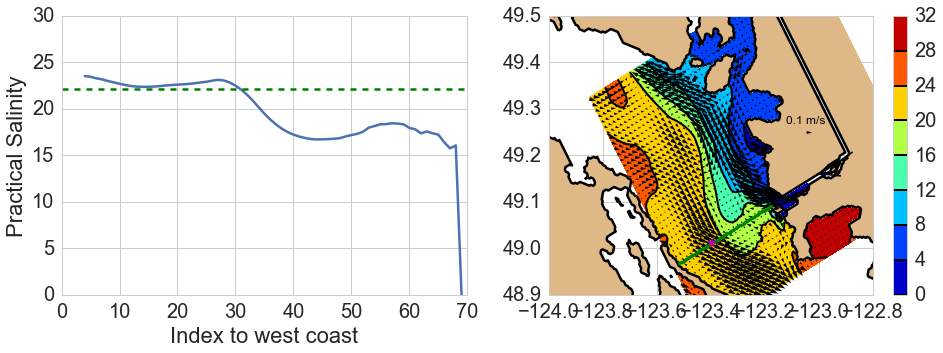

In [27]:
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,72,143,0,0.2) ## May 4~6, spring tides

In [28]:
def rmix_each(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind):
    """This function was made to plot the averaged Rmix spatial pattern
    of each run case"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    fig = plt.figure(figsize=(18,14))
    gs = gridspec.GridSpec(3, 2,width_ratios=[1,1], height_ratios=[1,1,1])  
    gs.update(hspace=0.2, wspace=0.1)
    levels = [0.1,0.3,0.5,0.7,0.9]
    for ti, ax in zip(['onlyriver','river+tides','river+winds','nof','all'],[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),\
                     fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[2,0])]):
        CS = ax.contourf(lon[:],lat[:],rmix[ti],levels,cmap = 'jet',extend='both')
        CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_title(ti)
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])

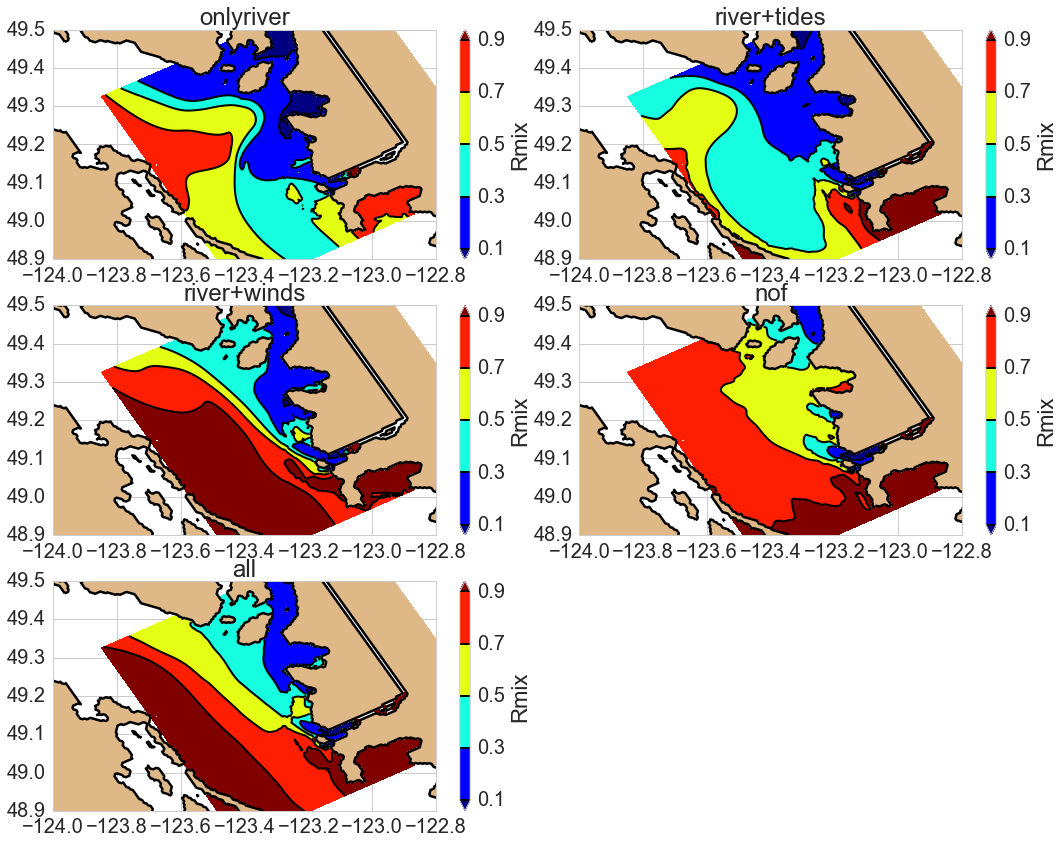

In [29]:
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10)

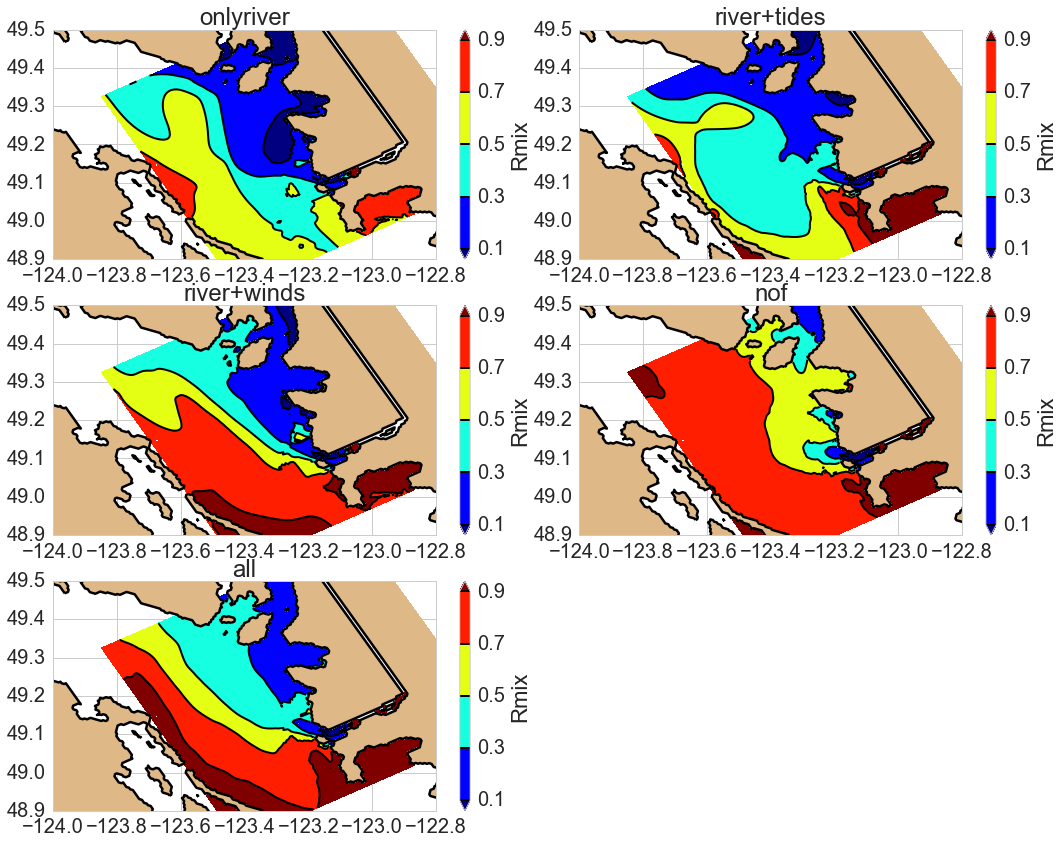

In [30]:
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10)

i,lon,real salinity 35 -123.355 18.3831
i,lon,real salinity 36 -123.35 18.1294
i,lon,real salinity 46 -123.298 18.1085
i,lon,real salinity 47 -123.293 18.2393
i,lon,real salinity 54 -123.257 18.3885
i,lon,real salinity 55 -123.251 18.1596
i,lon,real salinity 57 -123.241 18.0621
S_ref 20.1906
S_thre 18.2172550964
i,lon,real salinity 16 -123.454 12.7985
i,lon,real salinity 17 -123.449 12.5722
i,lon,real salinity 49 -123.283 12.4527
i,lon,real salinity 50 -123.277 12.7642
S_ref 15.2856
S_thre 12.625544529


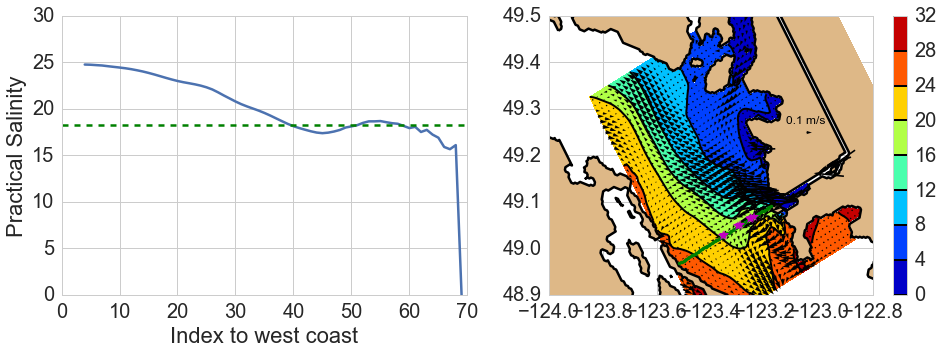

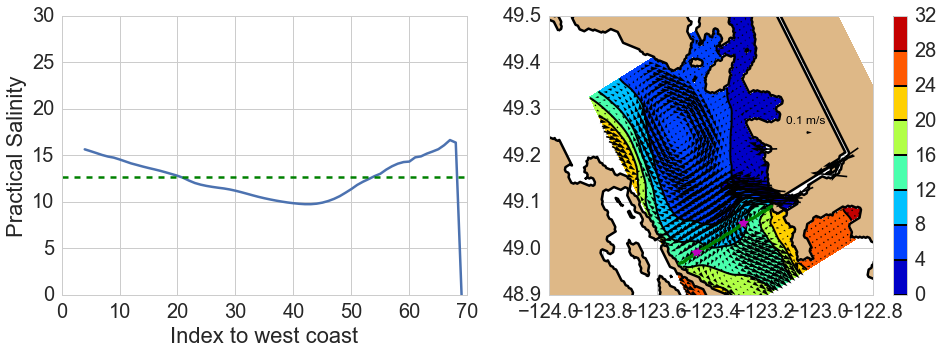

In [31]:
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,360,455,0,0.2) ## May 16~19, spring tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,648,695,0,0.2) ## May 28~29, neap tides

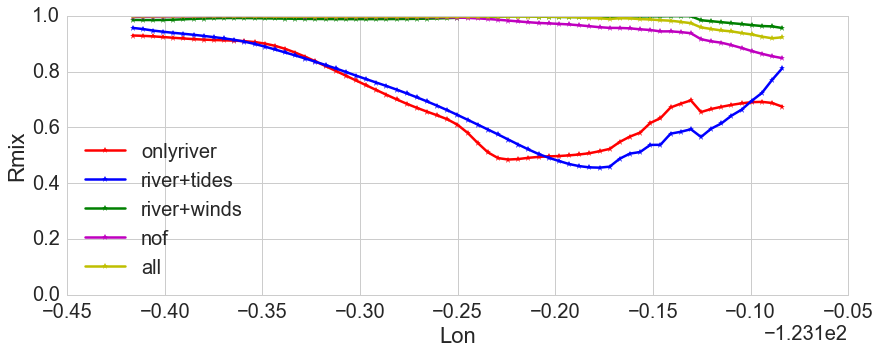

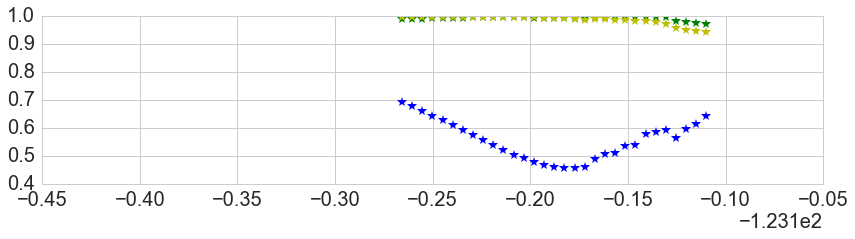

In [32]:
## moderate winds + late spring to neap: oct 18~20
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,408,480,np_mask,10)

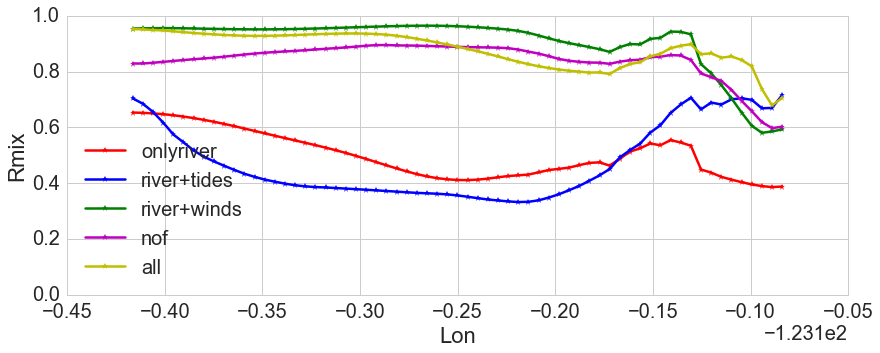

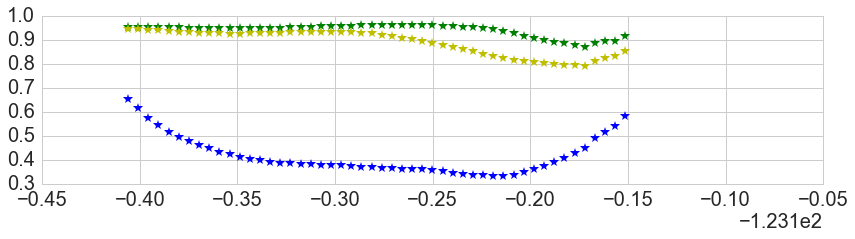

In [33]:
## moderate winds +neap tides: may 13~15
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,288,359,np_mask,10)

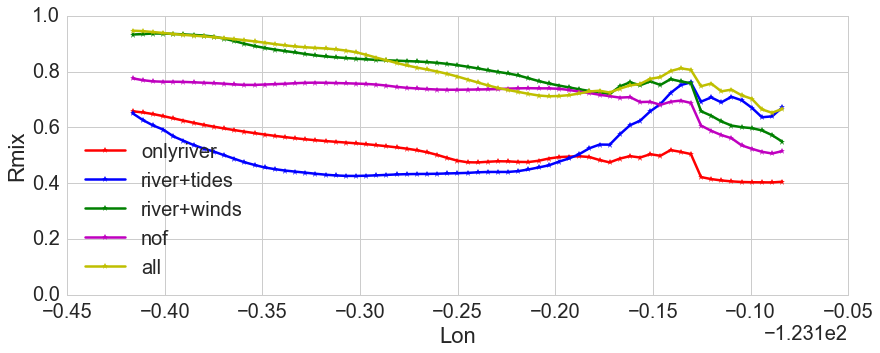

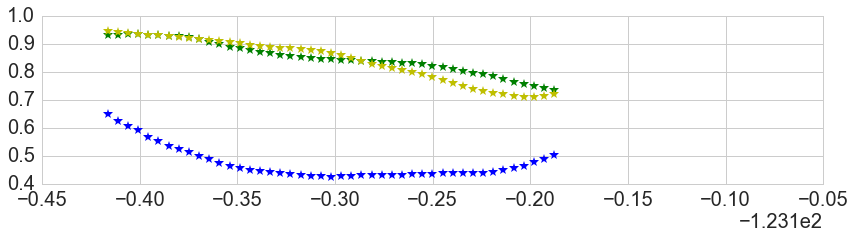

In [34]:
## moderate winds +spring tides: may 16~19
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,360,455,np_mask,10)

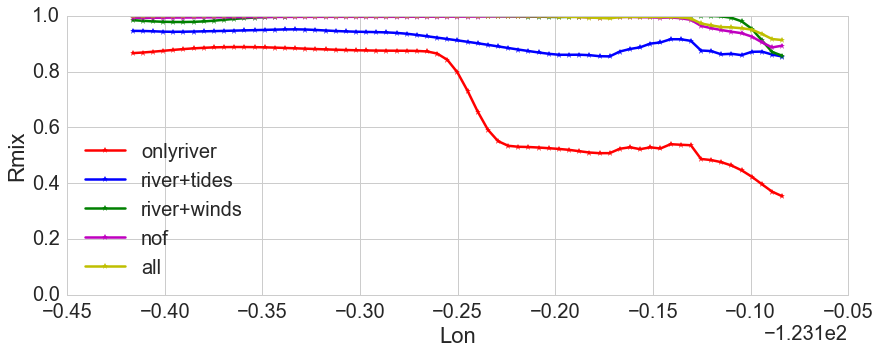

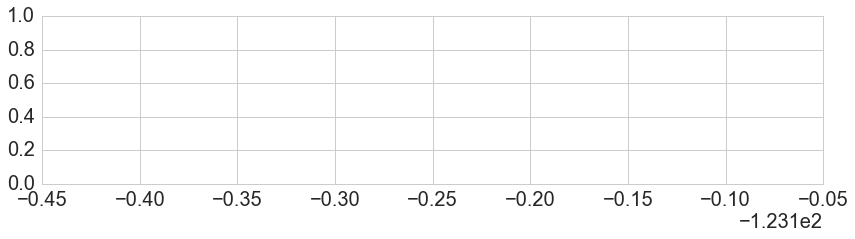

In [35]:
## moderate winds + late neap early tides: jan 17~19
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,384,455,np_mask,10)

* strong wind

i,lon,real salinity 44 -123.309 28.1728
i,lon,real salinity 45 -123.303 28.0463
i,lon,real salinity 46 -123.298 27.9612
i,lon,real salinity 47 -123.293 27.901
S_ref 28.811
S_thre 28.0444909286
S_ref 23.4999
S_thre 21.9898586655
i,lon,real salinity 18 -123.444 25.7039
i,lon,real salinity 19 -123.438 25.6032
i,lon,real salinity 20 -123.433 25.5273
i,lon,real salinity 21 -123.428 25.4859
i,lon,real salinity 22 -123.423 25.4853
i,lon,real salinity 23 -123.418 25.5286
i,lon,real salinity 24 -123.412 25.6098
i,lon,real salinity 25 -123.407 25.7063
i,lon,real salinity 26 -123.402 25.7908
i,lon,real salinity 52 -123.267 25.7141
i,lon,real salinity 53 -123.262 25.5304
S_ref 26.6591
S_thre 25.5914213562


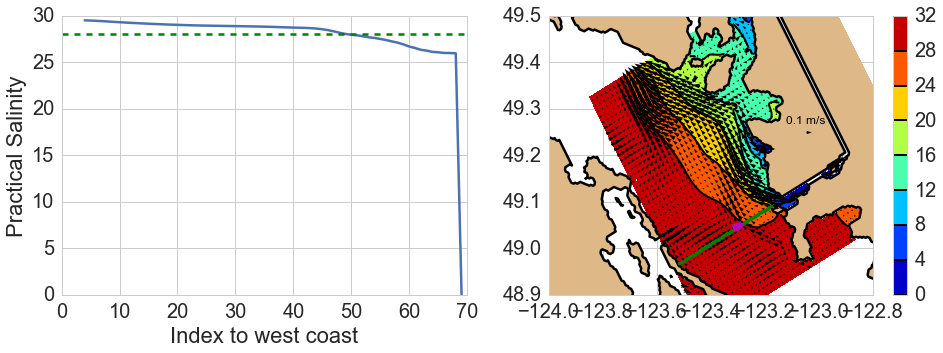

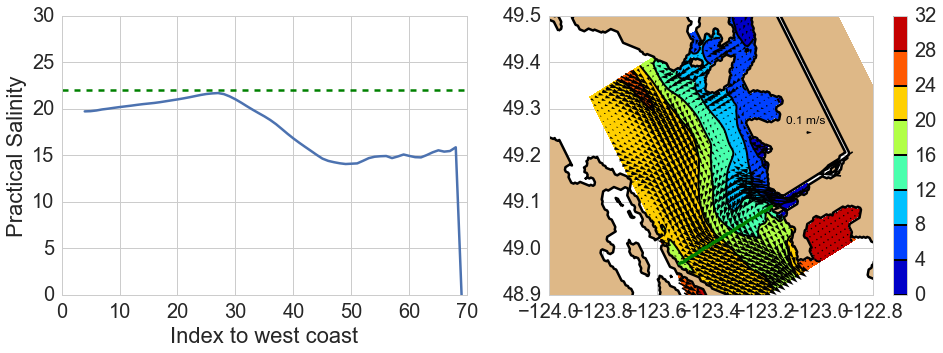

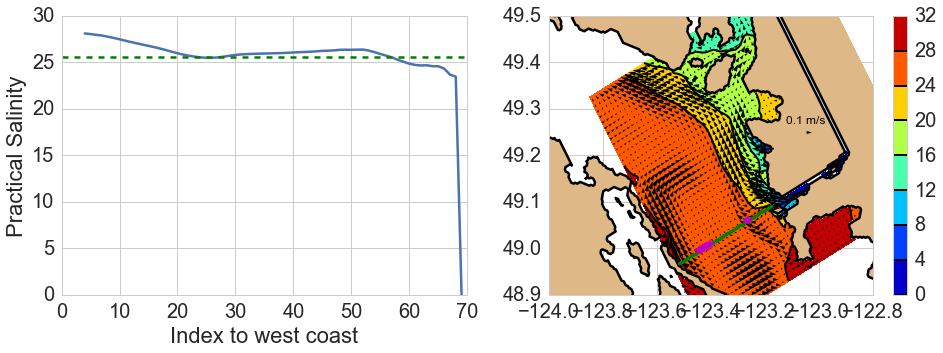

In [36]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,480,551,0,0.2) ## Oct 21~23, neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,24,95,0,0.2) ## May 2~4, early spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,624,671,0,0.2) ## Jan 21~23, spring tides

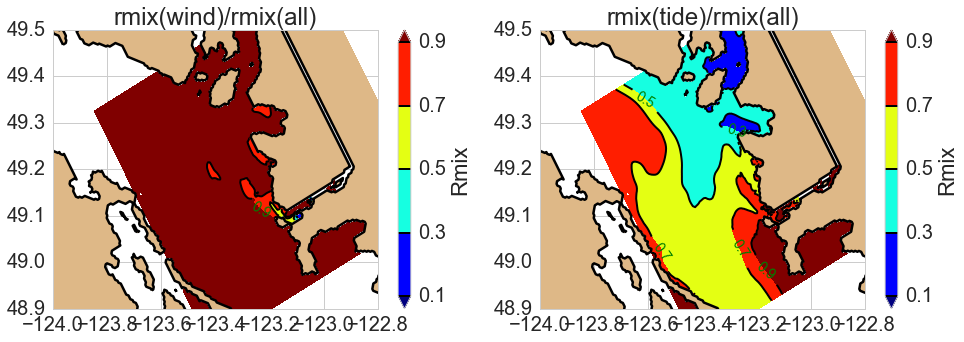

In [37]:
threshold_whole_domain(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,671,719,10,strings = strings)

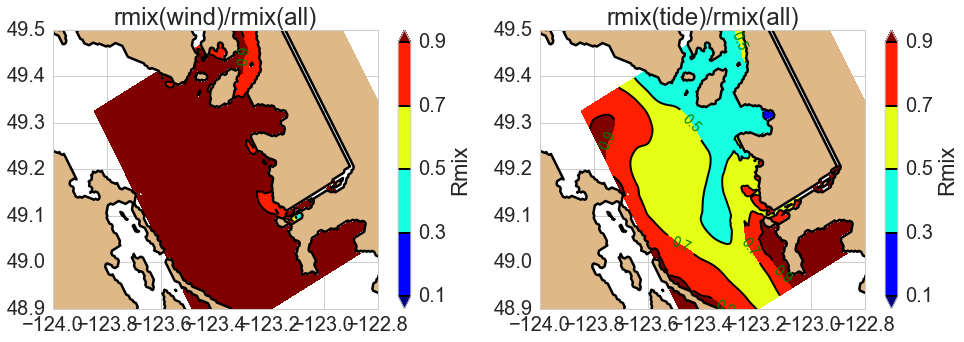

In [38]:
## the whole domain, strong winds + neap, oct 21~23
threshold_whole_domain(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,480,551,10,strings = strings)

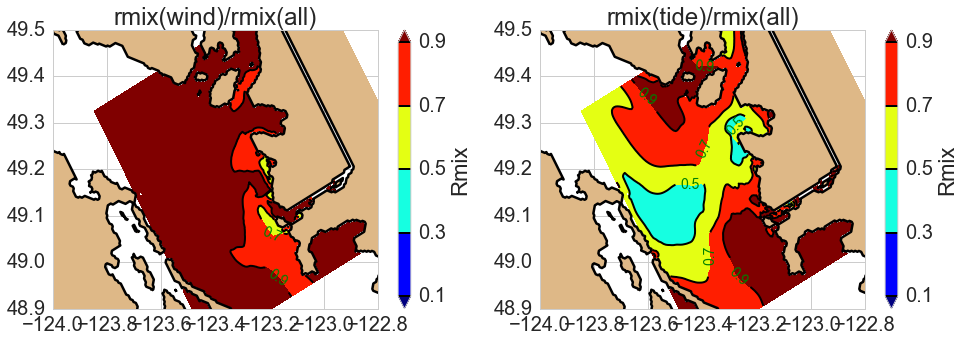

In [39]:
# the whole domain, strong winds + early spring tides, may 2~4
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,95,10,strings = strings)

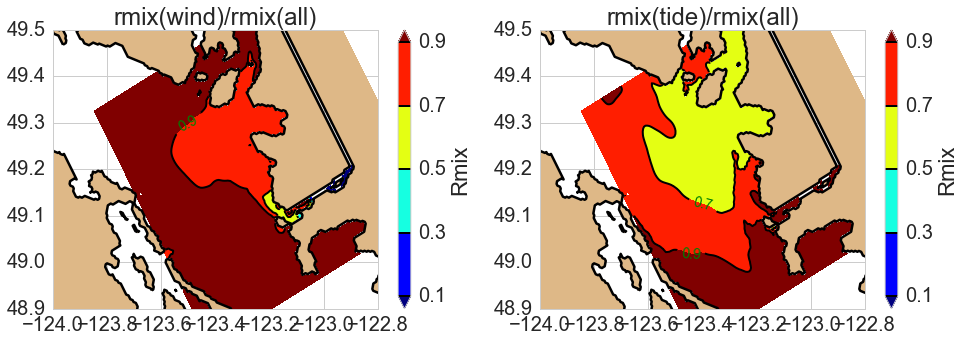

In [40]:
# the whole domain, strong winds + spring tides, jan 21~23
threshold_whole_domain(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10,strings = strings)

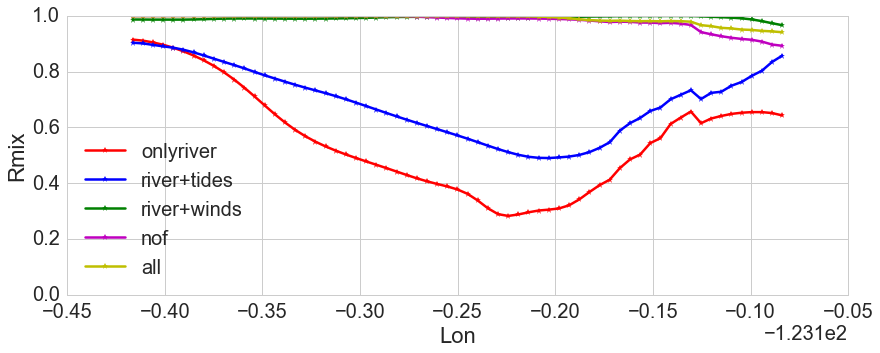

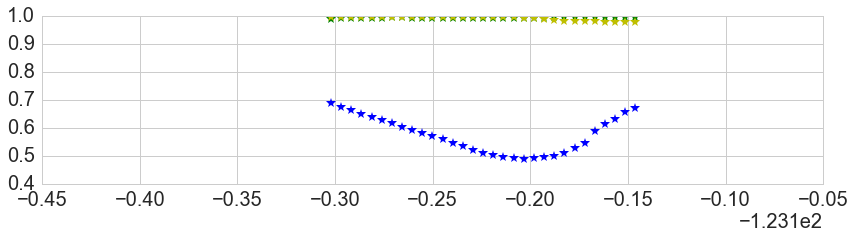

In [41]:
## strong winds + neap: oct 21~23
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,480,551,np_mask,10)

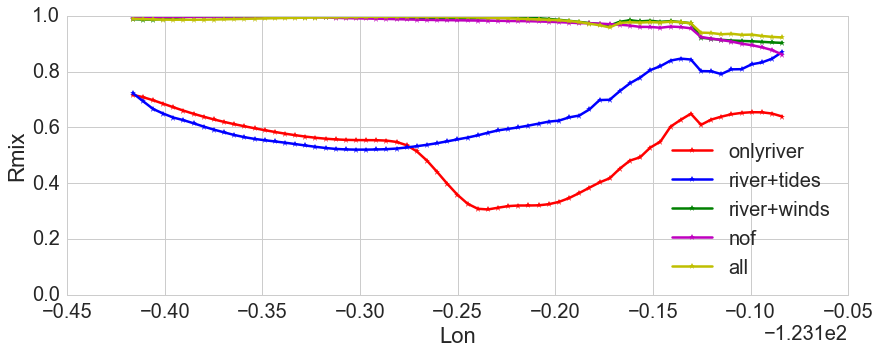

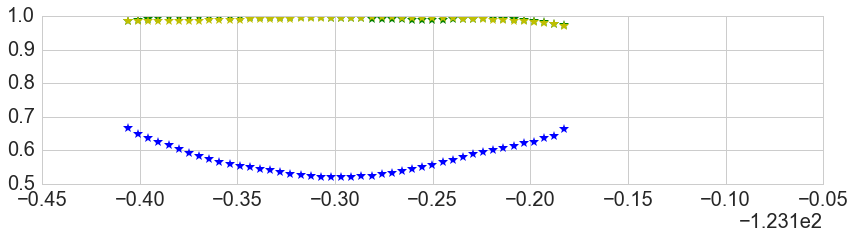

In [42]:
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,671,719,np_mask,10)

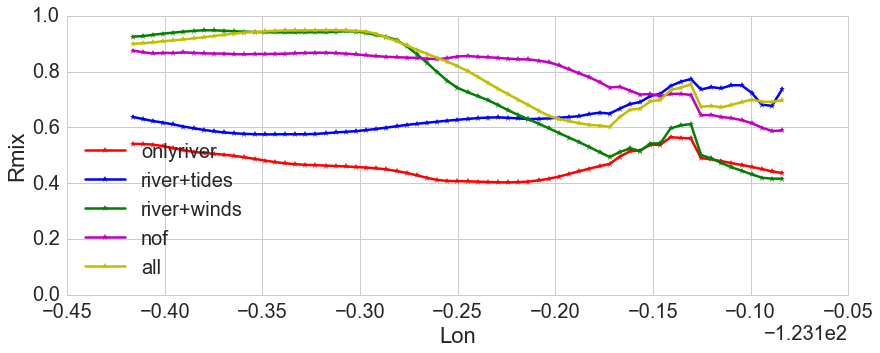

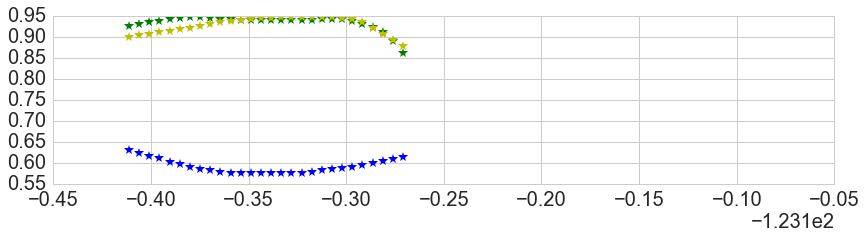

In [43]:
## strong winds + early spring: may 2~4
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,24,95,np_mask,10)

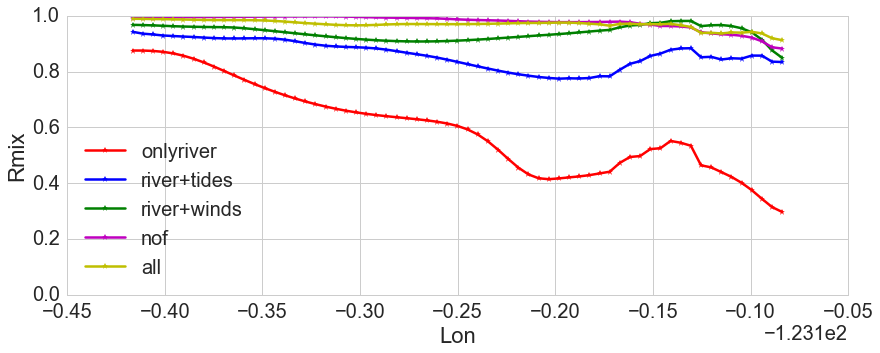

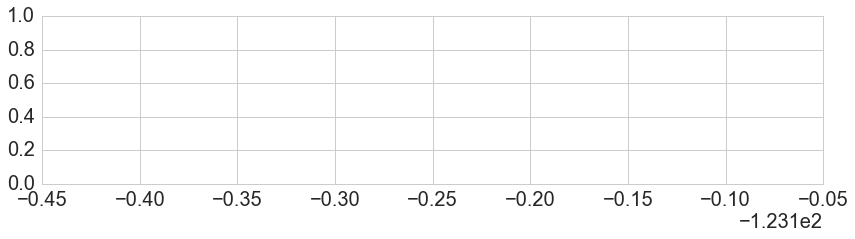

In [44]:
## strong winds + spring: jan 21~23
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,624,671,np_mask,10)

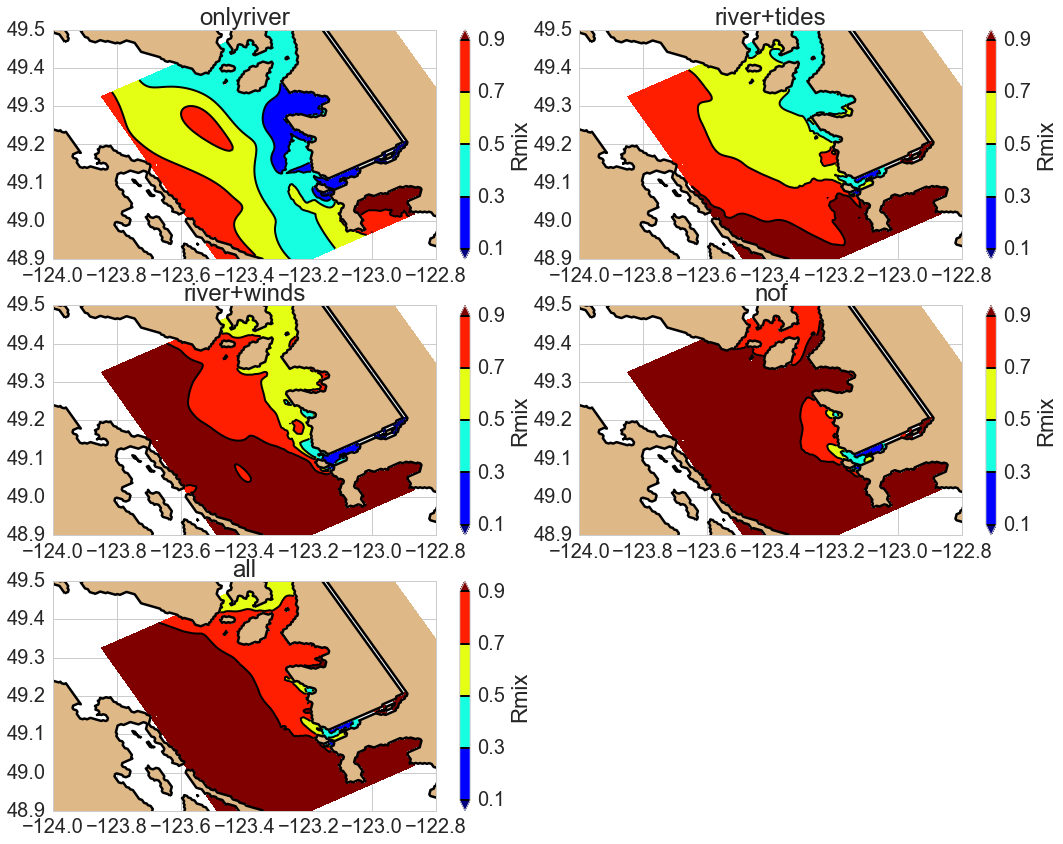

In [45]:
rmix_each(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10)